In [1]:
import tensorflow as tf
import cv2
from PIL import Image
%config Completer.use_jedi=False

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
batch_size = 32
epochs = 5
IMG_HEIGHT = 300
IMG_WIDTH = 300

In [4]:
train_dir = r'./images/train/'
validation_dir = r'./images/validation/'

In [5]:
train_buy_dir = os.path.join(train_dir, 'buy')  
train_sell_dir = os.path.join(train_dir, 'sell')  
train_stand_dir = os.path.join(train_dir, 'stand')  

validation_buy_dir = os.path.join(validation_dir, 'buy')  
validation_sell_dir = os.path.join(validation_dir, 'sell')  
validation_stand_dir = os.path.join(validation_dir, 'stand')  

In [6]:
num_buy_tr = len(os.listdir(train_buy_dir))
num_sell_tr = len(os.listdir(train_sell_dir))
num_stand_tr = len(os.listdir(train_stand_dir))

num_buy_val = len(os.listdir(validation_buy_dir))
num_sell_val = len(os.listdir(validation_sell_dir))
num_stand_val = len(os.listdir(validation_stand_dir))

total_train = num_buy_tr + num_sell_tr + num_stand_tr
total_val = num_buy_val + num_sell_val + num_stand_val

In [7]:
print('total training buy images:', num_buy_tr)
print('total training sell images:', num_sell_tr)
print('total training stand images:', num_stand_tr)
print('--')
print('total validation buy images:', num_buy_val)
print('total validation sell images:', num_sell_val)
print('total validation stand images:', num_stand_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training buy images: 158
total training sell images: 157
total training stand images: 789
--
total validation buy images: 68
total validation sell images: 68
total validation stand images: 339
--
Total training images: 1104
Total validation images: 475


In [8]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [9]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           class_mode="categorical",
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH))



Found 1104 images belonging to 3 classes.


In [10]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              class_mode="categorical",
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH))

Found 475 images belonging to 3 classes.


In [11]:
sample_training_images, _ = next(train_data_gen)

In [12]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

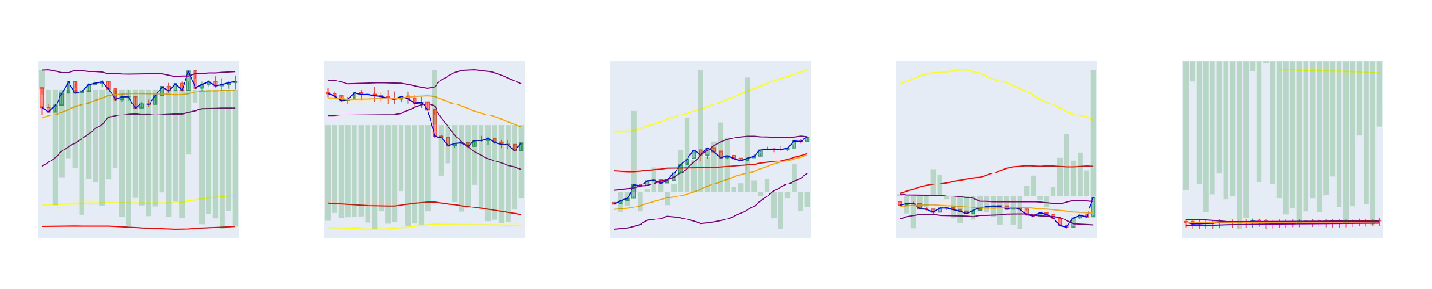

In [13]:
plotImages(sample_training_images[:5])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 300, 300, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 150, 150, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 150, 150, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val  // batch_size
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 34 steps, validate for 14 steps
Epoch 1/5
34/34 [==============================] - 60s 2s/step - loss: 0.8928 - accuracy: 0.7631 - val_loss: 0.4776 - val_accuracy: 0.8095
Epoch 2/5
34/34 [==============================] - 61s 2s/step - loss: 0.4771 - accuracy: 0.8075 - val_loss: 0.4753 - val_accuracy: 0.8095
Epoch 3/5
34/34 [==============================] - 62s 2s/step - loss: 0.4741 - accuracy: 0.8078 - val_loss: 0.4790 - val_accuracy: 0.8095
Epoch 4/5
34/34 [==============================] - 60s 2s/step - loss: 0.4750 - accuracy: 0.8113 - val_loss: 0.4818 - val_accuracy: 0.8095
Epoch 5/5
34/34 [==============================] - 60s 2s/step - loss: 0.4721 - accuracy: 0.8091 - val_loss: 0.4821 - val_accuracy: 0.8073


In [18]:
for image_batch, label_batch in train_data_gen:
    print("Image batch shape: ", image_batch.shape)
    print("Label batch shape: ", label_batch.shape)
    break

Image batch shape:  (32, 300, 300, 3)
Label batch shape:  (32, 3)


In [19]:
def prepare(filepath):
    IMG_SIZE = IMG_HEIGHT
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

In [20]:
prepare('./images/train/stand/2016-02-22_BTC_0.0.jpeg').shape

(1, 300, 300, 3)

In [21]:
prediction = model.predict([prepare('./images/train/sell/2019-02-20_BTC_-1.0.jpeg')])

In [22]:
print(prediction)

[[-451.7275  -523.91693  218.92947]]


In [23]:
print(np.argmax(prediction))

2


In [24]:
acoes = list(train_data_gen.class_indices.keys())

In [25]:
acoes[np.argmax(prediction)]

'stand'

In [27]:
model.save('BTC_Analysis')

INFO:tensorflow:Assets written to: BTC_Analysis\assets
